# EM2 Lab1, 27/11/2023
## RC Circuits
## Sebastian Aagaard, Thorbjørn Clausen, Nicholas Posborg

### Theory
In this lab excercise, we will measure on two RC couplings. We will meassure the charge/discharge time, together with its frequency pass properties and phase shift. All this is dependant on $\tau = RC$, wich will be ~constant as we will reuse the same resistor, capacitor pair.

There will be two circuits used, illustrated below.

![RC Circuits](RC_circuits.png)

Figure 0: Highpass and lowpass RC circuits.



Where a) acts as a "highpass filter", and b) acts as a "lowpass filter".

In part 1 of the excercise, $V_{in}$ will be a pulse generator. The generator gives a square wave, where we can see the charge discharge properties on the lowpass filter. The highpass will have a simular graph, but with an opposite effect of letting through the initial burst and then falling to zero. We will meassure the characteristic times of these effects and thereby $\tau=RC$.

Qualitatively, we'd expect the lowpass configuration to take time to achieve the input voltage, since the configuration is in effect a standard capacitor charge circuit. This could be interpreted as high frequencies being block, so that the capacitor is forced to charge slowly. The highpass we'd expect to behave exactly opposite, since only the surge currents are let through, but over time the capacitor will block the input source, and this would then act as a discharge curve.

In part 2, we will have a sine wave generator as $V_{in}$. By varying the frequency of which, we can meassure the gain factor and phaseshift of the two circuits. This will be done by sweeping through a range of frequencies, and meassuring the amplitude and phase shift of the output signal.

Note that the lineraity of the circuit makes it so that the voltage levels won't have an effect on our meassured properties.

From calculating with Kirschoffs' laws, the input voltage $\tilde{U}_{in}$ and the impedances $Z_{R}=R$ and $Z_{C}=-\frac{i}{\omega C}$, one can derive relationsships on the output voltage $\tilde{U}_{out}$.

For the lowpass filter one gets:

$$\tilde{U}_{out} = \tilde{U}_C=\frac{Z_C}{Z_R+Z_C}\tilde{U}_{in}=\frac{\frac{1}{\omega^2C^2}+i\frac{R}{\omega C}}{R^2+\frac{1}{\omega^2C^2}}\tilde{U}_{in}$$

Attempting to find the gain factor, one can take only the real component:

$$\frac{U_{out}}{U_{in}}=G=\frac{1}{\omega^2C^2R^2+1}$$

And on can find the phase shift by finding the modulus of the complex gain factor:

$$\phi = \arctan\left(\frac{\frac{R}{\omega C}}{\frac{1}{\omega^2C^2}}\right)=\arctan\left(\omega RC\right)$$

For the highpass, the coresponding formulas would take the form:

$$\tilde{U}_{out} = \tilde{U}_R=\frac{Z_R}{Z_R+Z_C}\tilde{U}_{in}=R\frac{R-i\frac{1}{\omega C}}{R-\frac{i}{\omega C}}\tilde{U}_{in}$$

$$\frac{U_{out}}{U_{in}}=G=\frac{1}{\frac{1}{\omega^2C^2R^2}+1}$$

$$\phi = \arctan\left(\frac{-\frac{1}{\omega C}}{R}\right)=-\arctan\left(\frac{1}{\omega RC}\right)$$



### Experimental setup

We first built the RC circuit by connecting a resistor and a capacitor in series. The voltage was meassured with an oscilloscope using Picoscope. for the lowpass filter meassurements we meassured the voltage across the capacitor, and for the highpass filter we meassured the voltage across the resistor. The input voltage was meassured across the whole circuit. (as the picoscope has 2 channels we could meassure both input and output at the same time)

For the first set of meassurements we used a pulse generator as input voltage. We set the pulse generator to give a square wave we did this for both low pass and high pass filter, and meassured on the rising edges as well as the falling edges. this was repeated 64 times for each filter and edge.

For the second set of meassurements we hooked the sine wave generator up to the circuit, and meassured the output voltage for a range of frequencies. We did this for both filters, and meassured the amplitude and phase shift for each frequency.



### Part 1, Capacitor charge/discharge


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
############### DATA IMPORT ###############
Data=[[],[],[],[]]
sets=['Målinger RC-kreds opladning (lowpass)/Målinger RC-kreds opladning (lowpass)_',
      'RC-kreds afladning (highpass)/RC-kreds afladning (highpass)_',
      'RC-kreds afladning (lowpass)/RC-kreds afladning (lowpass)_',
      'RC-kreds opladning (highpass)/RC-kreds opladning (highpass)_']
for j in range(4):
    for i in range(64):
        if i+1<10:
            path = 'Data/' + sets[j] + '0'+str(i+1)
        else:
            path = 'Data/' + sets[j] + str(i+1)
        Data[j].append(np.genfromtxt(path+"_new.csv", delimiter=';',skip_header=4))


Data=np.array(Data)

# to SI
Data[:,:,:,0]=Data[:,:,:,0]*1e-3

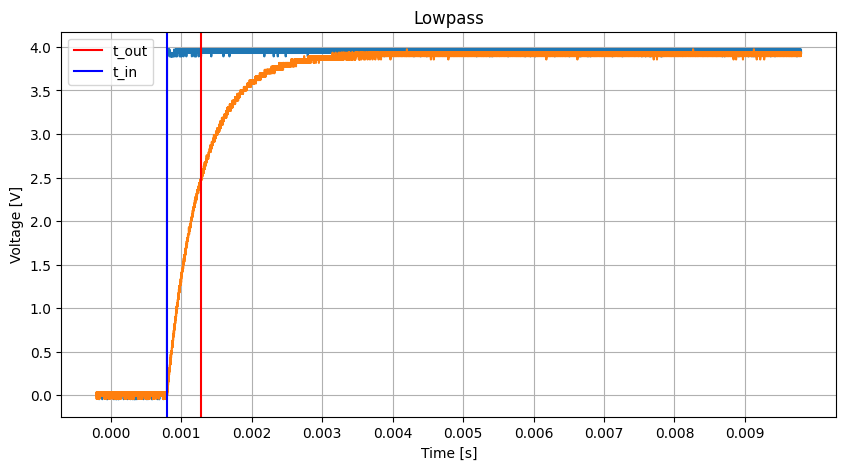

Figure 1: Lowpass filter voltage rensponse under sudden voltage rise. Shows the gradual increasing response.


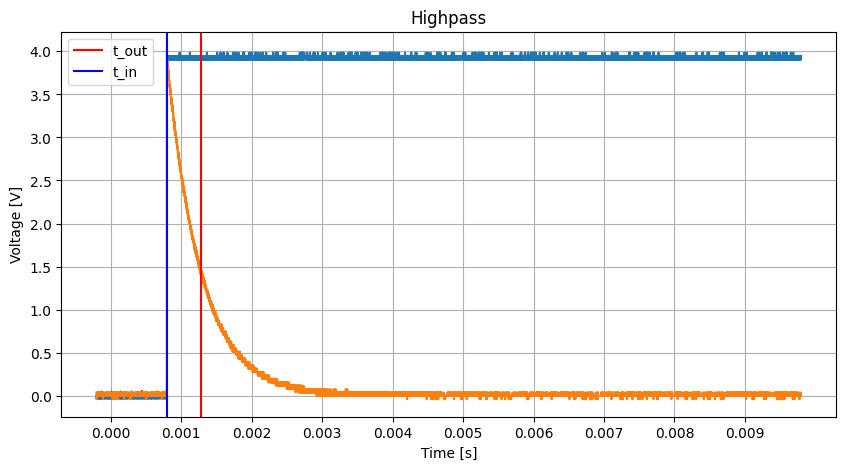

Figure 2: Highpass filter voltage response under sudden voltage rise. Shows the high frequency throughput, and then a slow decrease.

Resulting expected time constant:
τ =[ 3.085 ± 0.013 ]ms
*Note: this a factor 2π than the visual time, since this is in radian frequency


In [3]:
############### PLOT ###############
for j in range(4):
    for i in range(64):
        Data[j][i]=Data[j][i]-np.mean(Data[j][i][0:1000], axis=0)
        if np.mean(Data[j][i,:,1])<0:
            Data[j,i,:,1]=-Data[j,i,:,1]
            Data[j,i,:,2]=-Data[j,i,:,2]

taus=[[],[],[],[]]
for j in range(4):
    tau=[]
    if(j%2==0):
        for i in range(64):
            max=np.max(Data[j][i][:,1])
            t_out=Data[j][i][np.argmax(Data[j][i][:,2]>max-(max/np.exp(1)))][0]
            t_in=Data[j][i][np.argmax(Data[j][i][:,1]>max-(max/np.exp(1)))][0]
            tau.append(t_out-t_in)
    else:
        for i in range(64):
            max=np.max(Data[j][i][:,2])
            t_out=Data[j][i][-np.argmax(Data[j][i][::-1,2]>(max/np.exp(1)))][0]
            t_in=Data[j][i][np.argmax(Data[j][i][:,1]>(max/np.exp(1)))][0]
            tau.append(t_out-t_in)
    if j <2:
        plt.figure(figsize=(10,5))
        plt.plot(Data[j][0][:,0],Data[j][1][:,1])
        plt.plot(Data[j][0][:,0],Data[j][1][:,2])
        plt.axvline(t_out, color='r',label='t_out')
        plt.axvline(t_in, color='b',label='t_in')
        plt.xlabel('Time [s]')
        plt.ylabel('Voltage [V]')
        if j%2==0:
            plt.title('Lowpass')
        else:
            plt.title('Highpass')
        plt.xticks(np.arange(0, 0.01, 0.001))
        plt.legend()
        plt.grid()
        plt.show()
        if j%2==0:
            print("Figure 1: Lowpass filter voltage rensponse under sudden voltage rise. Shows the gradual increasing response.")
        else:
            print("Figure 2: Highpass filter voltage response under sudden voltage rise. Shows the high frequency throughput, and then a slow decrease.")
    taus[j]=[np.mean(tau),np.std(tau)]
    #print(np.std(tau))



taus=np.array(taus)

AVG=np.average(taus.T[0],weights=taus.T[1]**-2)*2*np.pi
STD=1/np.sqrt(np.sum(taus.T[1]**-2))*2*np.pi
taus=[AVG]
tau_errs=[STD]
print()
print('Resulting expected time constant:')
print('\u03C4 =[',np.round(AVG*1000,3),'\u00b1',np.round(STD*1000,3),']ms')
print('*Note: this a factor 2\u03C0 than the visual time, since this is in radian frequency')

This $\tau$ is meassured as a mean of the characteristic time, meassured over 4 sets of data. These sets constitute charge/discharge, rissing/falling edge, and for each, there are 64 meassurements. The error is estimated as the standard deviation of the mean.

### Part 2, Highpass/lowpass filter


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi
from scipy.optimize import curve_fit
from IPython.display import Markdown, display

V = 1
mV = 1e-3*V
uV = 1e-6*V
Hz = 1
kHz = 1e3*Hz
MHz = 1e6*Hz

Meassurements:

*Note that we did a set 2, because we found that our computer charging cables where inducing noise in the circuit. The set 2 is then smaller due to time constraints, but more safe to draw results from.

In [5]:

data_frequenceresponse_highpass_set1 = {
    'Frequency': [10.09, 51.75, 100.8, 511.8,1007, 5.106*kHz,10100],
    'Amplitude_A': [157.5*mV, 315*mV, 680*mV, 2.6*V, 2.764*V, 2.758*V, 2.755*V],
    'Amplitude_B': [6*mV,19*mV, 90*mV, 2.324*V, 2.620*V, 2.76*V, 2.76*V],
    'Phase': [-1.67,-1.575,-1.285, -0.564, -0.313, -0.063, -0.034]
}
data_frequenceresponse_highpass_stds_set1 = {
    'Frequency': [0.01,0.07,0.1,0.3,1,0,0],
    'Amplitude_A': [0,0.2*mV,80*mV, 0.005*V,0.003*V,3*mV,0.1*mV],
    'Amplitude_B': [3*mV,4*mV,10*mV, 0.001*V,6*mV,10*mV,10*mV],
    'Phase': [0.03,0.007,0.003,0.001,0.006,0.007,0.006]
}
data_frequenceresponse_lowpass_set1 = {
    'Frequency': [10100,5169, 1006, 513.4,100.7, 51.05, 10.02],
    'Amplitude_A': [2.753*V, 2.744*V, 2.761*V, 2.621*V, 690*mV, 200*mV, 60*mV],
    'Amplitude_B': [80*mV, 157.5*mV, 0.858*V, 1.40*V, 700*mV, 360*mV, 70*mV],
    'Phase': [1.3, 1.4,1.24, 0.990, 0.30, 0.149, 0.02]
}
data_frequenceresponse_lowpass_stds_set1 = {
    'Frequency': [0,8,0,0.4,0.2,0.04,0],
    'Amplitude_A': [4*mV,0,0,0.002*mV,50*mV,40*mV,10*mV],
    'Amplitude_B': [10*mV,0,8*mV,0.02*mV,100*mV,50*mV,20*mV],
    'Phase': [0.6,0.3,0.02,0.01,0.02,0.009,0.01]
}

data_frequenceresponse_highpass_set2 = {
    'Frequency': [37.34,376.4, 3.75*kHz,1.007*kHz],
    'Amplitude_A': [1.001,1.001,0.9974,0.9926],
    'Amplitude_B': [112*mV, 745.8*mV, 0.992,0.9422],
    'Phase': [-1.36,-0.711,-0.085,-0.311]
}
data_frequenceresponse_highpass_stds_set2 = {
    'Frequency': [0.02,0,0,0],
    'Amplitude_A': [0,0.2*mV,0,0],
    'Amplitude_B': [0.04*mV,0,0,0],
    'Phase': [0.04,0.002,0.001,0.003]
}
data_frequenceresponse_lowpass_set2 = {
    'Frequency': [365.0, 35.98, 3.6130*kHz, 36.32*kHz,10.14],
    'Amplitude_A': [0.992, 1.002, 994.5*mV, 990.8*mV, 1.002*V],
    'Amplitude_B': [670.7*mV,0.987*V,91.68*mV, 19.5*mV, 0.9926*V],
    'Phase': [0.834, 0.110, 1.62, 3.003-(pi/4),0.028]
}
data_frequenceresponse_lowpass_stds_set2 = {
    'Frequency': [0.7,0,0.07*Hz,30*Hz,0],
    'Amplitude_A': [0.001,0.002,0,0,0],
    'Amplitude_B': [0.7*mV,0.002*V,0.06*mV,0.2*mV,0.3*mV],
    'Phase': [0.005,0.01, 0.06,0.3,0.007]
}

In [6]:
#convert to numpy arrays, and add a small systematic error for good measure
for set in [data_frequenceresponse_highpass_set1, data_frequenceresponse_lowpass_set1, data_frequenceresponse_highpass_set2, data_frequenceresponse_lowpass_set2, data_frequenceresponse_highpass_stds_set1, data_frequenceresponse_lowpass_stds_set1, data_frequenceresponse_highpass_stds_set2, data_frequenceresponse_lowpass_stds_set2]:
    set['Frequency'] = np.array(set['Frequency'])
    set['Frequency'] = np.sqrt(set['Frequency']**2 + 0.1**2)
    set['Amplitude_A'] = np.array(set['Amplitude_A'])
    set['Amplitude_A'] = np.sqrt(set['Amplitude_A']**2 + 0.002**2)
    set['Amplitude_B'] = np.array(set['Amplitude_B'])
    set['Amplitude_B'] = np.sqrt(set['Amplitude_B']**2 + 0.002**2)
    set['Phase'] = np.array(set['Phase'])
    set['Phase'] = np.sqrt(set['Phase']**2 + 0.002**2)

set
    

{'Frequency': array([ 0.70710678,  0.1       ,  0.12206556, 30.00016667,  0.1       ]),
 'Amplitude_A': array([0.00223607, 0.00282843, 0.002     , 0.002     , 0.002     ]),
 'Amplitude_B': array([0.00211896, 0.00282843, 0.0020009 , 0.00200998, 0.00202237]),
 'Phase': array([0.00538516, 0.01019804, 0.06003332, 0.30000667, 0.00728011])}

In [7]:
def chi2_red(y, y_fit, sigma_y, n_params):
    return 1/(len(y)-n_params)*np.sum((y-y_fit)**2/sigma_y**2)
    

Got from lowpass RC=$\tau$=[2.99±0.06]ms

Fit $\Chi^2_{red}$=14.35

Got from highpass RC=$\tau$=[2.97±0.01]ms

Fit $\Chi^2_{red}$=0.45

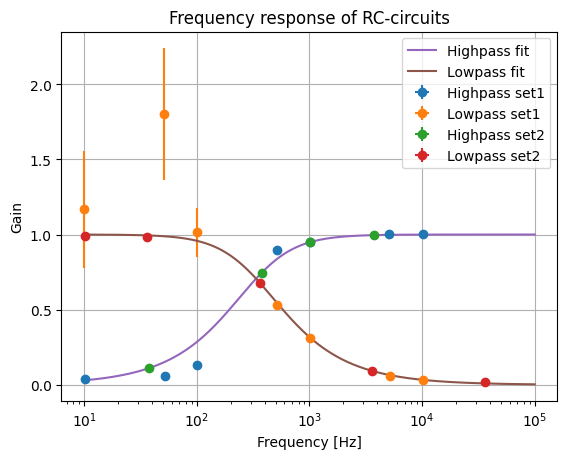

Figure 3: Frequency response of the RC-circuits throughout the four performed sweeps. The theoretical fits are also shown.


In [8]:
############### FREQUENCY RESPONSE ###############
def plotFrequencyResponse(freqs, freq_stds, ampA, ampA_std, ampB, ampB_std,label):
    g = ampB/ampA
    g_std = g*np.sqrt((ampA_std/ampA)**2+(ampB_std/ampB)**2)
    plt.errorbar(freqs, g, yerr=g_std, xerr=freq_stds, fmt='o', label=label)
    

plotFrequencyResponse(
    data_frequenceresponse_highpass_set1['Frequency'],
    data_frequenceresponse_highpass_stds_set1['Frequency'],
    data_frequenceresponse_highpass_set1['Amplitude_A'],
    data_frequenceresponse_highpass_stds_set1['Amplitude_A'],
    data_frequenceresponse_highpass_set1['Amplitude_B'],
    data_frequenceresponse_highpass_stds_set1['Amplitude_B'],
    label='Highpass set1'
)
plotFrequencyResponse(
    data_frequenceresponse_lowpass_set1['Frequency'],
    data_frequenceresponse_lowpass_stds_set1['Frequency'],
    data_frequenceresponse_lowpass_set1['Amplitude_A'],
    data_frequenceresponse_lowpass_stds_set1['Amplitude_A'],
    data_frequenceresponse_lowpass_set1['Amplitude_B'],
    data_frequenceresponse_lowpass_stds_set1['Amplitude_B'],
    label='Lowpass set1'
)
plotFrequencyResponse(
    data_frequenceresponse_highpass_set2['Frequency'],
    data_frequenceresponse_highpass_stds_set2['Frequency'],
    data_frequenceresponse_highpass_set2['Amplitude_A'],
    data_frequenceresponse_highpass_stds_set2['Amplitude_A'],
    data_frequenceresponse_highpass_set2['Amplitude_B'],
    data_frequenceresponse_highpass_stds_set2['Amplitude_B'],
    label='Highpass set2'
)
plotFrequencyResponse(
    data_frequenceresponse_lowpass_set2['Frequency'],
    data_frequenceresponse_lowpass_stds_set2['Frequency'],
    data_frequenceresponse_lowpass_set2['Amplitude_A'],
    data_frequenceresponse_lowpass_stds_set2['Amplitude_A'],
    data_frequenceresponse_lowpass_set2['Amplitude_B'],
    data_frequenceresponse_lowpass_stds_set2['Amplitude_B'],
    label='Lowpass set2'
)

theoretical_highpass = lambda omega, RC: omega*RC/(np.sqrt(1+(omega*RC)**2))
theoretical_lowpass = lambda omega, RC: 1/(np.sqrt(1+(omega*RC)**2))



fit_lowpass, cov_lowpass = curve_fit(theoretical_lowpass, 
                                       data_frequenceresponse_lowpass_set2['Frequency'], 
                                       data_frequenceresponse_lowpass_set2['Amplitude_B']/data_frequenceresponse_lowpass_set2['Amplitude_A'],
                                       sigma=data_frequenceresponse_lowpass_stds_set2['Amplitude_B']/data_frequenceresponse_lowpass_set2['Amplitude_A']
                                       )

display(Markdown(r"Got from lowpass RC=$\tau$=[{:.2f}±{:.2f}]ms".format(np.abs(fit_lowpass[0])*1e3, np.sqrt(cov_lowpass[0,0])*1e3)))
taus.append(fit_lowpass[0])
tau_errs.append(np.sqrt(cov_lowpass[0,0]))
display(Markdown(r"Fit $\Chi^2_{{red}}$={:.2f}".format(
    chi2_red(
        data_frequenceresponse_lowpass_set2['Amplitude_B']/data_frequenceresponse_lowpass_set2['Amplitude_A'], 
        theoretical_lowpass(data_frequenceresponse_lowpass_set2['Frequency'], *fit_lowpass), 
        data_frequenceresponse_lowpass_stds_set2['Amplitude_B']/data_frequenceresponse_lowpass_set2['Amplitude_A'], 1))))

fit_highpass, cov_highpass = curve_fit(theoretical_highpass, 
                                       data_frequenceresponse_highpass_set2['Frequency'], 
                                       data_frequenceresponse_highpass_set2['Amplitude_B']/data_frequenceresponse_highpass_set2['Amplitude_A'],
                                       sigma=data_frequenceresponse_highpass_stds_set2['Amplitude_B']/data_frequenceresponse_highpass_set2['Amplitude_A'],
                                        p0=fit_lowpass,
                                        maxfev=10000
                                        )
display(Markdown(r"Got from highpass RC=$\tau$=[{:.2f}±{:.2f}]ms".format(np.abs(fit_highpass[0])*1e3, np.sqrt(cov_highpass[0,0])*1e3)))
taus.append(fit_highpass[0])
tau_errs.append(np.sqrt(cov_highpass[0,0]))
display(Markdown(r"Fit $\Chi^2_{{red}}$={:.2f}".format(
    chi2_red(
        data_frequenceresponse_highpass_set2['Amplitude_B']/data_frequenceresponse_highpass_set2['Amplitude_A'],
        theoretical_highpass(data_frequenceresponse_highpass_set2['Frequency'], *fit_highpass),
        data_frequenceresponse_highpass_stds_set2['Amplitude_B']/data_frequenceresponse_highpass_set2['Amplitude_A'], 1))))



omega = np.logspace(1, 5, 1000)
plt.plot(omega, theoretical_highpass(omega, *fit_highpass), label='Highpass fit')
plt.plot(omega, theoretical_lowpass(omega, *fit_lowpass), label='Lowpass fit')

plt.xscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain')
plt.legend()
plt.grid()
plt.title('Frequency response of RC-circuits')
print()
plt.show()
print("Figure 3: Frequency response of the RC-circuits throughout the four performed sweeps. The theoretical fits are also shown.")

The cracteristic time constants are here found as the best fit coefficients. Errors are estimated by the covariance matrix.

Got from lowpass RC=$\tau$=[3±2]ms

Fit $\Chi^2_{red}$=12.00

Got from highpass RC=$\tau$=[3.2±0.3]ms

Fit $\Chi^2_{red}$=15.40

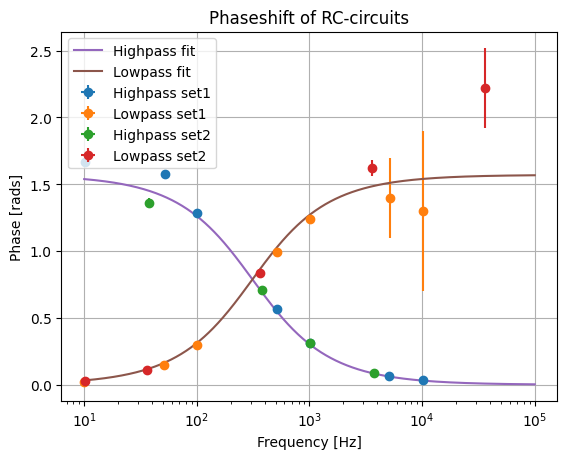

Figure 4: Phaseshift of the RC-circuits throughout the four performed sweeps. The theoretical fits are also shown.


In [9]:
############### PHASE ###############
def plotPhase(freqs, freq_stds, phase, phase_std,label):
    freqs = np.array(freqs)
    freq_stds = np.array(freq_stds)
    phase = np.array(phase)
    phase_std = np.array(phase_std)
    plt.errorbar(freqs, phase, yerr=phase_std, xerr=freq_stds, fmt='o', label=label)

plotPhase(
    data_frequenceresponse_highpass_set1['Frequency'],
    data_frequenceresponse_highpass_stds_set1['Frequency'],
    data_frequenceresponse_highpass_set1['Phase'],
    data_frequenceresponse_highpass_stds_set1['Phase'],
    label='Highpass set1'
)
plotPhase(
    data_frequenceresponse_lowpass_set1['Frequency'],
    data_frequenceresponse_lowpass_stds_set1['Frequency'],
    data_frequenceresponse_lowpass_set1['Phase'],
    data_frequenceresponse_lowpass_stds_set1['Phase'],
    label='Lowpass set1'
)
plotPhase(
    data_frequenceresponse_highpass_set2['Frequency'],
    data_frequenceresponse_highpass_stds_set2['Frequency'],
    data_frequenceresponse_highpass_set2['Phase'],
    data_frequenceresponse_highpass_stds_set2['Phase'],
    label='Highpass set2'
)
plotPhase(
    data_frequenceresponse_lowpass_set2['Frequency'],
    data_frequenceresponse_lowpass_stds_set2['Frequency'],
    data_frequenceresponse_lowpass_set2['Phase'],
    data_frequenceresponse_lowpass_stds_set2['Phase'],
    label='Lowpass set2'
)

theoretical_highpass = lambda omega, RC: np.arctan(1/(omega*RC))
theoretical_lowpass = lambda omega, RC: np.arctan(-omega*RC)

fit_lowpass, cov_lowpass = curve_fit(theoretical_lowpass, data_frequenceresponse_lowpass_set2['Frequency'], data_frequenceresponse_lowpass_set2['Phase'])

display(Markdown(r"Got from lowpass RC=$\tau$=[{:.0f}±{:.0f}]ms".format(np.abs(fit_lowpass[0])*1e3, np.sqrt(cov_lowpass[0,0])*1e3)))
taus.append(fit_lowpass[0])
tau_errs.append(np.sqrt(cov_lowpass[0,0]))
display(Markdown(r"Fit $\Chi^2_{{red}}$={:.2f}".format(
    chi2_red(
        data_frequenceresponse_lowpass_set2['Phase'],
        theoretical_lowpass(data_frequenceresponse_lowpass_set2['Frequency'], *fit_lowpass),
        data_frequenceresponse_lowpass_stds_set2['Phase'], 1))))

fit_highpass, cov_highpass = curve_fit(theoretical_highpass, data_frequenceresponse_highpass_set2['Frequency'], data_frequenceresponse_highpass_set2['Phase'],
                                        p0=[0.0005], maxfev=10000)

display(Markdown(r"Got from highpass RC=$\tau$=[{:.1f}±{:.1f}]ms".format(np.abs(fit_highpass[0])*1e3, np.sqrt(cov_highpass[0,0])*1e3)))
taus.append(fit_highpass[0])
tau_errs.append(np.sqrt(cov_highpass[0,0]))
display(Markdown(r"Fit $\Chi^2_{{red}}$={:.2f}".format(
    chi2_red(
        data_frequenceresponse_highpass_set2['Phase'],
        theoretical_highpass(data_frequenceresponse_highpass_set2['Frequency'], *fit_highpass),
        data_frequenceresponse_highpass_stds_set2['Phase'], 1))))


omega = np.logspace(1, 5, 1000)
plt.plot(omega, theoretical_highpass(omega, *fit_highpass), label='Highpass fit')
plt.plot(omega, theoretical_lowpass(omega, *fit_lowpass), label='Lowpass fit')

plt.xscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [rads]')
plt.legend(loc='upper left')
plt.grid()
plt.title('Phaseshift of RC-circuits')
print()
plt.show()
print("Figure 4: Phaseshift of the RC-circuits throughout the four performed sweeps. The theoretical fits are also shown.")

Value and error are again found off the best fit coefficients and covariance matrix.

From all this we have meassure RC-constants, where we do a proper weighted average over all the experiments, weighted by error, and errorpropagated throughout.

In [13]:
#take weighted average of taus
tau = np.average(taus, weights=1/np.array(tau_errs)**2)
#tau_err = np.sqrt(np.sum(np.array(tau_errs)**2))
tau_err = np.sqrt(1/np.sum(1/np.array(tau_errs)**2))
display(Markdown(r"Got from weighted average $\tau$={:.2f}±{:.2f}ms".format(tau*1e3, tau_err*1e3)))

Got from weighted average $\tau$=2.92±0.01ms

One can note that the resulting taus are slightly differing although relatively similar. This is probably due to how the second experiment had few points to do a fit by, among with the observation we had that it was quite sensitive to noise.

Even still, the experiments shows satisfyingly the properties of RC-circuits.